In [105]:
import sys
sys.path.append("../..")

import pandas
import math

from bokeh.io import export_png, export_svgs
from bokeh.models import ColumnDataSource, DataTable, TableColumn
from pandas import DataFrame

# Import dictonaries and Types
from app.components.basic_dataframes import dictMealState, dfMealCode, dfMealState
from app.components.simple_types import Nutrition, State
from app.components.extract_data.extract_data import *

# Use simple function
from app.components.search.papa_search import papaSingleSeach, SearchResult, fitness

from app.components.graphs.polar import plot_multiple_polar_charts

from app.components.extract_data.dataframes.dictionaries.nutrients import nutrients_signal

import random
import pickle
from IPython.display import clear_output

# Use simple function
from app.components.search.papa_search import papaSingleSeach, SearchResult

#Import graphic
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(dpi=300)

<Figure size 1920x1440 with 0 Axes>

<Figure size 1920x1440 with 0 Axes>

In [106]:
from typing import Any

def nutritionAdequancy(nutrition: Nutrition, personID: str):
    idealNutrition = Nutrition.idealNutritionByPersonId(personID)
    greaters = [ nutrient for nutrient, signal in nutrients_signal.items() if signal==">"]
    less = [ nutrient for nutrient, signal in nutrients_signal.items() if signal=="<"]
    quantity = len(nutrients_signal)
    
    adequancy = 0.0
    for nutrient in greaters:
        adequancy += min(1.0, nutrition[nutrient]/idealNutrition[nutrient])/quantity
    
    for nutrient in less:
        adequancy += (1.0 if nutrition[nutrient]<=idealNutrition[nutrient] else 0.0 )/quantity
        
    return adequancy
  
initialAdequancy = nutritionAdequancy(result.initialNutrition, personID)
finalAdequancy = nutritionAdequancy(result.finalNutrition, personID)

print("Greaters:", initialAdequancy, finalAdequancy )

Greaters: 0.6217243825924297 0.9158392026248137


In [107]:
personID = "UNKNOW"
personID = "110000016#7#1#5"
nutritionFactor = 100
nutritionFunction = Nutrition.absDifferenceNegativePenalty
distanceFactor=10
distanceFunction = State.squareDifference

In [117]:
def absDifferenceNegativePenalty(initNutrition, finalNutrition, mult=17) -> float:
        initNutrition: Nutrition = initNutrition
        finalNutrition: Nutrition = finalNutrition

        def calc(init: float, final: float, signal: str):
            if signal == ">":
                if init <= final:
                    return abs(init - final) * mult
                else:
                    # TODO: Try fix the energy
                    if init / final > 1.5:
                        # return abs(init - final) * mult
                        return abs(init - final)
                    else:
                        return abs(init - final)
            else:
                if init <= final:
                    return 0.0
                else:
                    return abs(init - final) * mult

        return sum(
            [
                (
                    calc(initNutrition[key], finalNutrition[key], nutrients_signal[key])
                    / finalNutrition[key]
                )
                for key in list(initNutrition)
            ]
        )

In [116]:
result = papaSingleSeach(
                personID, 
                verbose=True, 
                unit=10, max_unit=2, 
                max_population_set=50, 
                max_population_selected=10, 
                expansion_set=10, 
                expansion_select=5, 
                max_steps=80, 
                nutritionFitness=absDifferenceNegativePenalty, 
                crossover=0.2, 
                nutritionFactor=1.0, 
                distanceFactor=0.0
            )

Step 80: 
newPopulationOptions: [[4.80622795108836, State()], [4.811674080242973, State()], [4.807807463454859, State()], [4.814913872377687, State()], [4.811674080242973, State()], [4.818780489165799, State()], [4.810094567876472, State()], [4.818780489165799, State()], [4.8187280242200226, State()], [4.8187280242200226, State()], [4.8132939763103275, State()], [4.805560742734097, State()], [4.814913872377685, State()], [4.8132939763103275, State()], [4.8132939763103275, State()], [4.811661998998057, State()], [4.810094567876472, State()], [4.813334360011186, State()], [4.811661998998057, State()], [4.811661998998057, State()], [4.814307498028645, State()], [4.818820872866661, State()], [4.814307498028645, State()], [4.817200976799304, State()], [4.817200976799304, State()], [4.818780489165801, State()], [4.817160593098443, State()], [4.8186935356708664, State()], [4.816082525189439, State()], [4.818780489165801, State()], [4.809854180812376, State()], [4.804608055021001, State()], [4

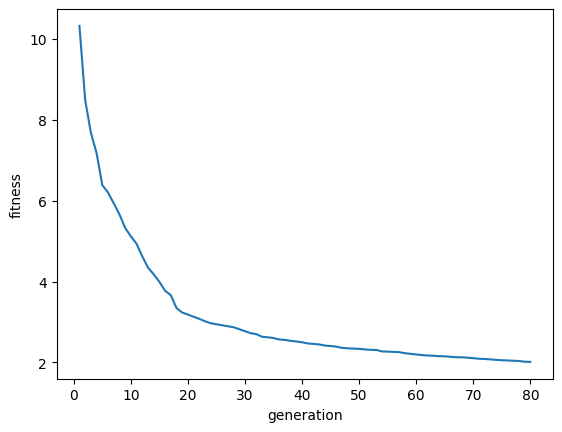

0.9192463958598425


In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.DataFrame({'generation': [ x+1 for x in range(len(result.bestList)) ], 'fitness': result.bestList})

sns.lineplot(data=data, x="generation", y="fitness")
plt.show()

print(nutritionAdequancy(result.finalNutrition, personID))

In [111]:
def convergenceFirst(bestList: list[float]):
    for i in range(2, len(result.bestList)):
        if( (result.bestList[i-1]-result.bestList[i])/result.bestList[i-1] < 0.001):
            return i
    return -1

In [ ]:
result017 = []
for i in range(30):
    clear_output()
    print("Starting", i)
    result = papaSingleSeach(
                personID, 
                verbose=False, 
                unit=50, max_unit=3, 
                max_population_set=20, 
                max_population_selected=10, 
                expansion_set=20, 
                expansion_select=5, 
                max_steps=80, 
                nutritionFitness=absDifferenceNegativePenalty, 
                crossover=0.1, 
                nutritionFactor=1.0, 
                distanceFactor=0.0
            )
    result017.append( (nutritionAdequancy(result.finalNutrition, personID), 
                       convergenceFirst(result.bestList)) )

Starting 2


In [ ]:
print(result017)

[(0.9520061288245505, 29), (0.9277728433049274, 27), (0.9637671899156387, 27), (0.9494116626280026, 21), (0.9595389233481144, 28), (0.9200732476150404, 31), (0.9361255469320243, 36), (0.9622637743692165, 27), (0.918907629141198, 27), (0.9608386768381832, 27), (0.9239118023725992, 34), (0.983181521060819, 28), (0.9299805307308051, 27), (0.9350430681289099, 24), (0.9539205383620806, 28), (0.9525531648182406, 31), (0.9394172634224625, 30), (0.9385549699422316, 26), (0.937559616988758, 28), (0.976713935846636, 27), (0.9714298629178088, 22), (0.9371841310955358, 29), (0.9515155085956507, 37), (0.93565168285408, 30), (0.9398179297113235, 27), (0.9583035543714491, 27), (0.9296489344258325, 27), (0.9220017485699247, 24), (0.9385414975777069, 37), (0.9552441449698211, 24)]


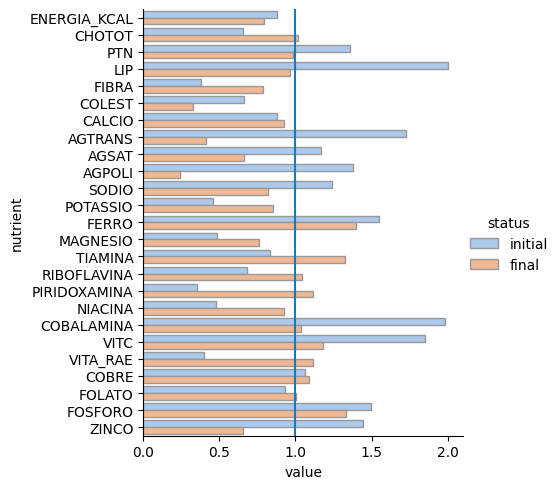

In [113]:
result.show_comparison_graph()

In [52]:
result.get_df()

,Nutrient,Initial Value,Final Value,Target Value
0,ENERGIA_KCAL,1728.680000,1561.530000,1971.590000
1,CHOTOT,36.187179,55.588170,55.000000
2,PTN,13.562414,9.993822,10.000000
3,LIP,17.443059,6.682201,6.666667
4,FIBRA,11.700000,22.930000,31.000000
5,COLEST,198.390000,100.360000,300.000000
6,CALCIO,763.840000,647.270000,868.000000
7,AGTRANS,0.768050,0.181721,0.444444
8,AGSAT,5.201609,2.687902,4.444444
9,AGPOLI,3.667334,0.947804,2.666667


In [2]:
fileNames = ["female25_100_agent.pickle",
             "male25_100_agent.pickle",
             "female60_100_agent.pickle",
             "male60_100_agent.pickle"]

groupNames = ["W25",
              "M25",
              "W60",
              "M60"]

quantity = 100

In [3]:
def getResults(fileName:str):
    try:
        with open("./output/" + fileName, "rb") as file:
            results = pickle.load(file)
            return [ result for id, result in results.items() ]
        
    except:
        raise FileNotFoundError

In [4]:
results = [getResults(fileName) for fileName in fileNames]

In [5]:
def get_result_by(resultList:list[list[SearchResult]], nutrient:str, type:str="nutrition"):
    if type=="nutrition":
        data_input = {
            "variable_name": nutrient, 
            "x_data": [], 
            "y_data": [], 
            "x_label": '1600 kcal - 2200 kcal', 
            'y_label': '2400 kcal - 3000 kcal'}
        
        
        data_input["x_data"] = np.array([ min(1.0, result[0].initialNutrition.data[nutrient]/Nutrition.idealNutritionByPersonId(result[0].personIDs[0])[nutrient]) for result in resultList])
        data_input["y_data"] = np.array([ min(1.0, result[1].finalNutrition.data[nutrient]/Nutrition.idealNutritionByPersonId(result[1].personIDs[0])[nutrient]) for result in resultList])       
            
        # print(len(data_input["x_data"]))
        return data_input
    else:
        data_input = {
            "variable_name": nutrient, # Group 
            "x_data": [], 
            "y_data": [], 
            "x_label": 'Initial', 
            'y_label': 'Final'}

        data_input["x_data"] = np.array([ min(1.0, result[0].initialNutrition.data[nutrient]/Nutrition.idealNutritionByPersonId(result[0].personIDs[0])[nutrient]) for result in resultList])
        data_input["y_data"] = np.array([ min(1.0, result[1].finalNutrition.data[nutrient]/Nutrition.idealNutritionByPersonId(result[1].personIDs[0])[nutrient]) for result in resultList])       
            
        return data_input

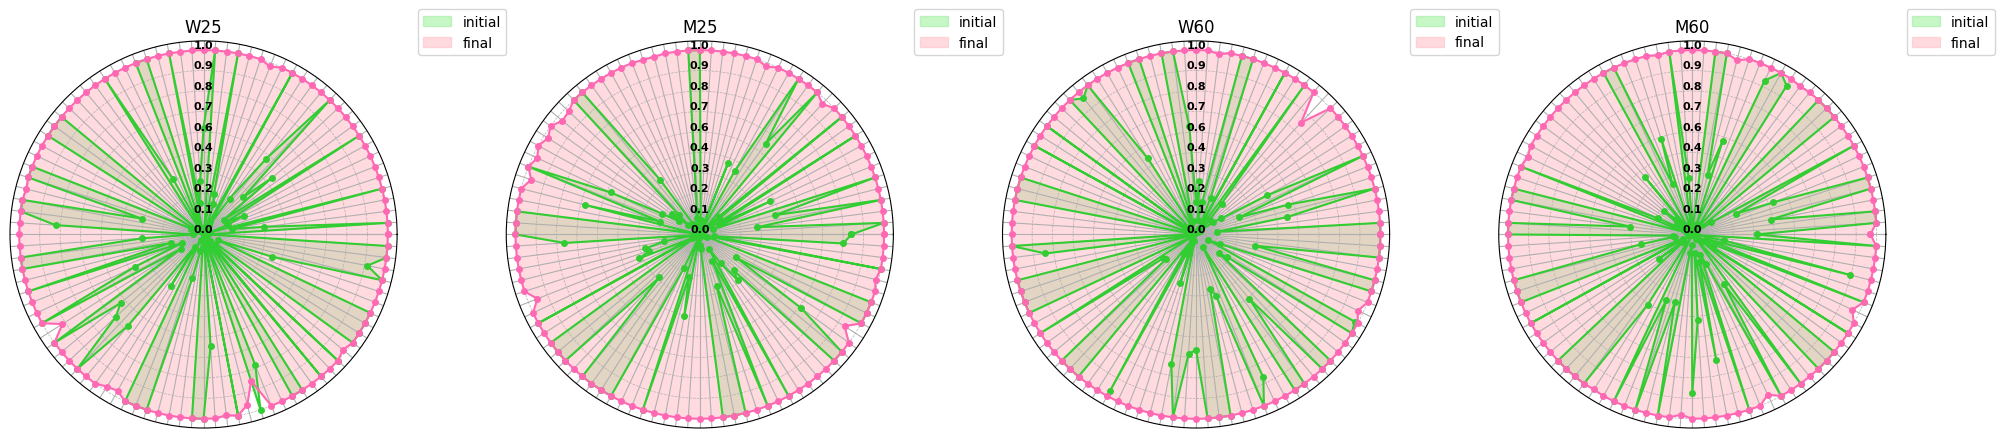

In [6]:

labels = [ "" for x in range(quantity)]

def getVIT(result, groupName, vit):
    resultVITC = get_result_by(result, vit)
    resultVITC["variable_name"] = groupName
    resultVITC["x_label"] = "initial"
    resultVITC["y_label"] = "final" 
    return resultVITC


resultsVITC =  [getVIT(results[i], groupNames[i], "VITC") for i in range(4)]
plot_multiple_polar_charts(resultsVITC, num_points=quantity, labels=labels)

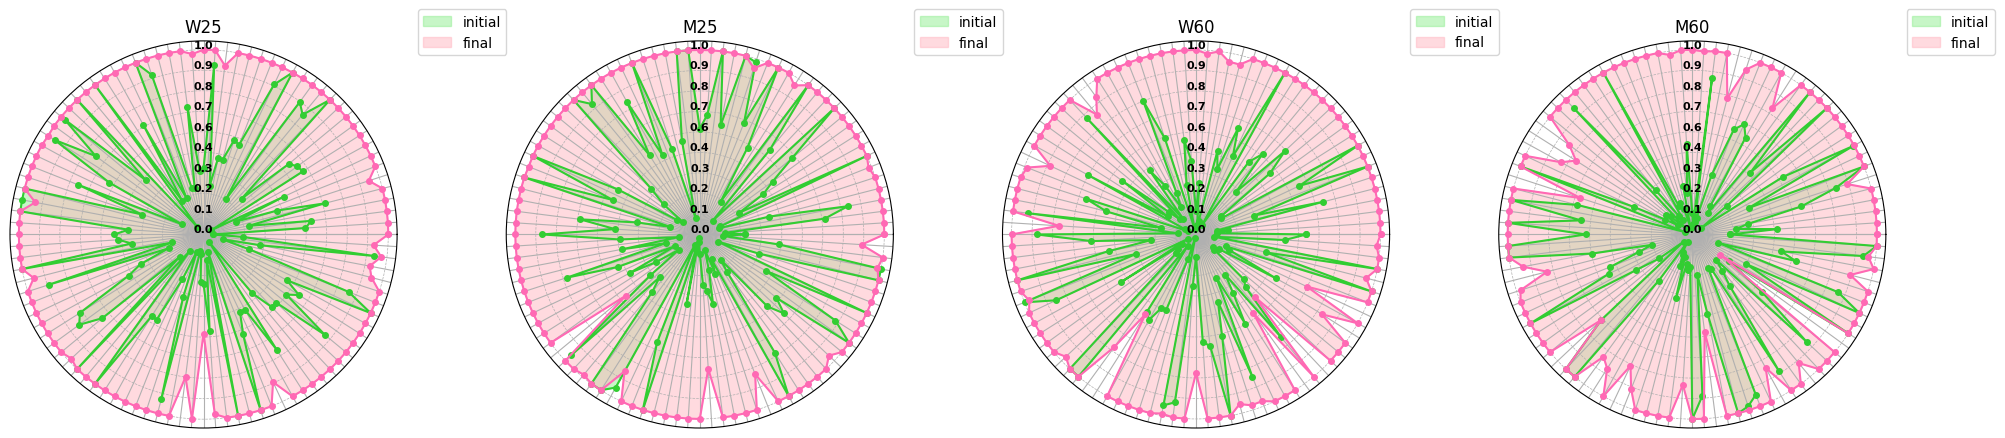

In [7]:
labels = [ "" for x in range(quantity)]

resultsPIRI =  [getVIT(results[i], groupNames[i], "PIRIDOXAMINA") for i in range(4)]
plot_multiple_polar_charts(resultsPIRI, num_points=quantity, labels=labels)

In [8]:
def get_result_by_greater_than(resultList:list[list[SearchResult]], nutrients:list[str]):
    data_input = {
        "variable_name": "GREATER", 
        "x_data": [], 
        "y_data": [], 
        "x_label": '1600 kcal - 2200 kcal', 
        'y_label': '2400 kcal - 3000 kcal'}
    
    data_input["x_data"] = np.array( [0.0 for x in range(quantity)])
    data_input["y_data"] = np.array( [0.0 for x in range(quantity)])

    for nutrient in nutrients:
        for i, result in enumerate(resultList):
            data_input["x_data"][i] += min(1.0, result[0].initialNutrition.data[nutrient]/Nutrition.idealNutritionByPersonId(result[0].personIDs[0])[nutrient])/len(nutrients)
            data_input["y_data"][i] += min(1.0, result[3].finalNutrition.data[nutrient]/Nutrition.idealNutritionByPersonId(result[0].personIDs[0])[nutrient])/len(nutrients)
     
        
    return data_input

W25 100 100
M25 100 100
W60 100 100
M60 100 100


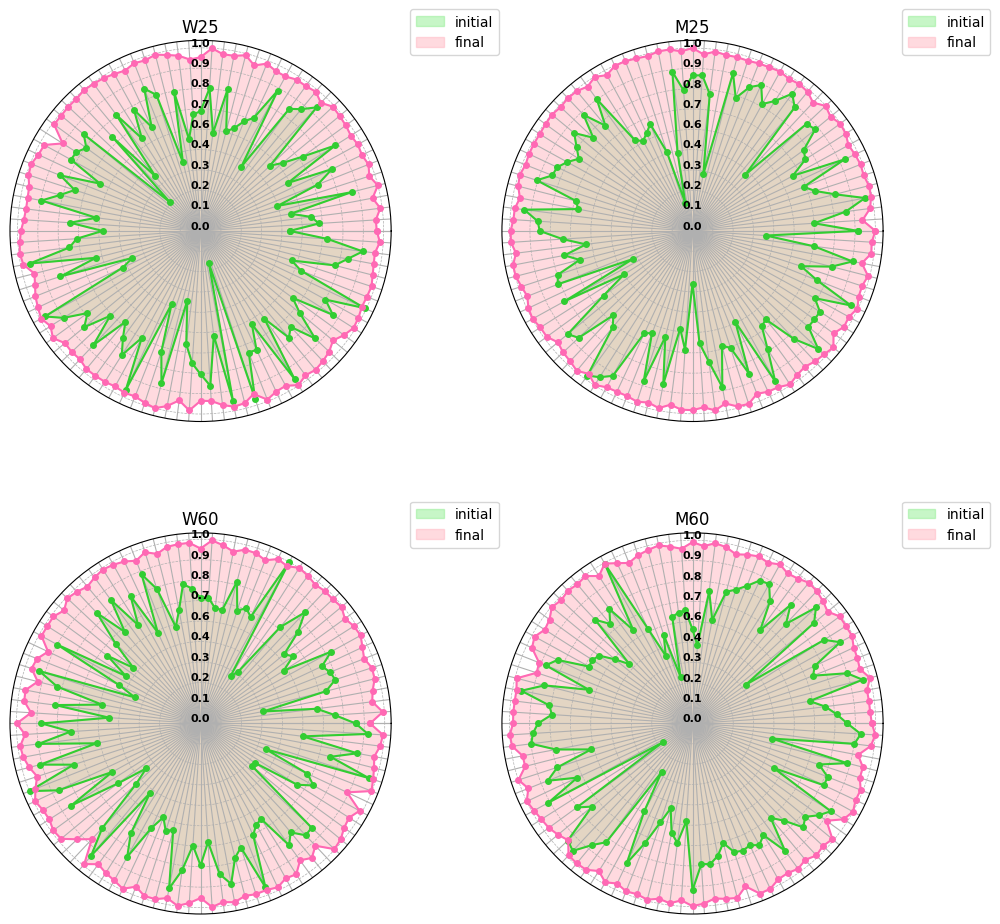

W25 0.6955511755088728 0.973362914841424 0.2778117393325512
M25 0.7364985829897782 0.9829523699543773 0.24645378696459908
W60 0.6916096027256987 0.9682908629939342 0.2766812602682355
M60 0.7238687172115409 0.9746530085712513 0.25078429135971037


In [10]:
labels = [ "" for x in range(quantity)]
nutrients = greaters

def getAll(result, groupName):
    resultG = get_result_by_greater_than(result, nutrients)
    resultG["variable_name"] = groupName
    resultG["x_label"] = "initial"
    resultG["y_label"] = "final" 
    return resultG

resultsAll =  [getAll(results[i], groupNames[i]) for i in range(4)]

for i in range(4):
    print(groupNames[i], len(resultsAll[i]["x_data"]), len(resultsAll[i]["y_data"]))
   

plot_multiple_polar_charts(resultsAll, num_points=quantity, labels=labels, rows=2, cols=2)

for i in range(4):
    print(groupNames[i], np.mean(resultsAll[i]["x_data"]), np.mean(resultsAll[i]["y_data"]), np.mean(resultsAll[i]["y_data"])-np.mean(resultsAll[i]["x_data"]))

In [11]:
1st Iteration
Group 01 0.6955511755088728 0.966037688701486 0.2704865131926132
Group 02 0.7364985829897782 0.9739890889454794 0.2374905059557012
Group 03 0.6916096027256987 0.959551672593434 0.2679420698677353
Group 04 0.7238687172115409 0.9646477736120284 0.24077905640048747

2nd Iteration
Group 01 0.966037688701486 0.973362914841424 0.007325226139938024
Group 02 0.9739890889454794 0.9829523699543773 0.008963281008897872
Group 03 0.959551672593434 0.9682908629939342 0.008739190400500196
Group 04 0.9646477736120284 0.9746530085712513 0.010005234959222897

SyntaxError: invalid syntax (559879485.py, line 1)

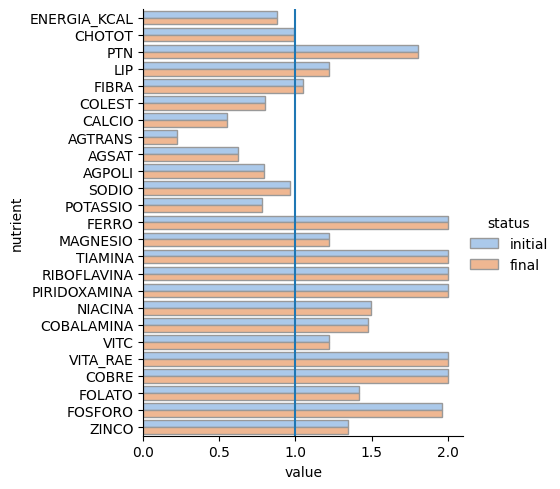

In [ ]:
results[0][0][3].show_comparison_graph()

In [ ]:
from app.components.scripts.get_tbca import TBCA

dictTBCAName = TBCA.getDictTBCA()
dictV9001ToTBCA = getDictV9001ToTbca()

In [ ]:
# 6303102 - Init: 17.0  / Final: 67.0
# 7004301 - Init: 40.0  / Final: 0.0
# 8400101 - Init: 16.0  / Final: 0.0
# 8004801 - Init: 65.0  / Final: 15.0
# 6501415 - Init: 0.0  / Final: 50.0
# 6501401 - Init: 0.0  / Final: 50.0
# 6900821 - Init: 0.0  / Final: 50.0
print(dictTBCAName[dictV9001ToTBCA["7004301"]])
print(dictTBCAName[dictV9001ToTBCA["8400101"]])
print(dictTBCAName[dictV9001ToTBCA["8004801"]])
print(dictTBCAName[dictV9001ToTBCA["6900821"]])
# print(dictTBCAName[dictV9001ToTBCA["6501401"]])
# print(dictTBCAName[dictV9001ToTBCA["6900821"]])
# print(dictTBCAName[dictV9001ToTBCA["8500224"]])
# print(dictTBCAName[dictV9001ToTBCA["7901201"]])

# 6501401 - Init: 40.0  / Final: 140.0
# 8502301 - Init: 0.0  / Final: 50.0
# 8216601 - Init: 0.0  / Final: 50.0
# 6500903 - Init: 0.0  / Final: 75.0
# 7900710 - Init: 0.0  / Final: 100.0

tbca code: C0031D
portuguese: Maionese, molho, tradicional  
english: Mayonnaise, with eggs, industrialized
nutrients: {'ENERGIA_KCAL': 3.06, 'CHOTOT': 0.079, 'PTN': 0.0058, 'LIP': 0.305, 'FIBRA': 0.0, 'COLEST': 0.425, 'AGSAT': 0.040999999999999995, 'AGPOLI': 0.154, 'AGTRANS': 0.0017000000000000001, 'CALCIO': 0.0348, 'FERRO': 0.001, 'SODIO': 7.86, 'MAGNESIO': 0.0086, 'FOSFORO': 0.145, 'POTASSIO': 0.161, 'ZINCO': 0.0006, 'COBRE': 0.0, 'VITA_RAE': 0.0827, 'TIAMINA': 0.0, 'RIBOFLAVINA': 0.0005, 'NIACINA': 0.0, 'PIRIDOXAMINA': 0.0, 'COBALAMINA': 0.0005, 'VITC': 0.0, 'FOLATO': 0.0208}
tbca code: C0002D
portuguese: Azeite, olivaOlea europaeaL. 
english: Oil, olives
nutrients: {'ENERGIA_KCAL': 9.0, 'CHOTOT': 0.0, 'PTN': 0.0, 'LIP': 1.0, 'FIBRA': 0.0, 'COLEST': 0.0, 'AGSAT': 0.149, 'AGPOLI': 0.095, 'AGTRANS': 0.0, 'CALCIO': 0.0, 'FERRO': 0.0001, 'SODIO': 0.0, 'MAGNESIO': 0.0, 'FOSFORO': 0.0, 'POTASSIO': 0.0, 'ZINCO': 0.0, 'COBRE': 0.0, 'VITA_RAE': 0.0, 'TIAMINA': 0.0, 'RIBOFLAVINA': 0.0, 'NIAC

In [ ]:
print(results[0][7][0].get_food_groups(initial=True))
print(results[0][7][2].get_food_groups(initial=False))

{'Meat products': 72.0, 'Seeds and nuts': 0.0, 'Legume products': 560.0, 'Vegetable products': 95.0, 'Beverages': 3200.0, 'Milk and dairy products': 0.0, 'Foods for special purposes': 0.0, 'Cereal products': 270.0, 'Sugary products': 0.0, 'Miscellaneous': 0.0, 'Fish and seafood': 0.0, 'Eggs and egg products': 0.0, 'Fruits and fruit products': 300.0, 'Fats and oils': 0.0}
{'Meat products': 0.0, 'Seeds and nuts': 0.0, 'Legume products': 560.0, 'Vegetable products': 95.0, 'Beverages': 3200.0, 'Milk and dairy products': 0.0, 'Foods for special purposes': 50.0, 'Cereal products': 270.0, 'Sugary products': 50.0, 'Miscellaneous': 0.0, 'Fish and seafood': 0.0, 'Eggs and egg products': 0.0, 'Fruits and fruit products': 350.0, 'Fats and oils': 0.0}


In [ ]:
nutrients = list(set(getDictV9001ToGroupEnNames().values()))
nutrients = {groupName:id for id,groupName in enumerate(nutrients) }	
len(nutrients)

14

In [ ]:
def get_result_by_groups(resultList:list[list[SearchResult]], first=0, last=3):
    nutrients = getListGroupsEn()
    nutrients = {groupName:id for id,groupName in enumerate(nutrients) }	
    
    data_input = {
        "variable_name": "GREATER", 
        "x_data": [], 
        "y_data": [], 
        "x_label": '1600 kcal - 2200 kcal', 
        'y_label': '2400 kcal - 3000 kcal'}
    
    data_input["x_data"] = np.array( [0.0 for x in range(len(nutrients))])
    data_input["y_data"] = np.array( [0.0 for x in range(len(nutrients))])
    
    resultsInitial = [ result[first].get_food_groups() for result in resultList ]
    resultsFinal = [ result[last].get_food_groups(initial=False) for result in resultList ]
    

    for nutrient, id in nutrients.items():
        for result in resultsInitial:
            data_input["x_data"][id] += (result[nutrient])/len(resultList)
            
        for result in resultsFinal:
            data_input["y_data"][id] += (result[nutrient])/len(resultList)
     
        
    return data_input

In [ ]:
nutrients = getListGroupsEn()
nutrients

['Vegetable products',
 'Sugary products',
 'Fats and oils',
 'Beverages',
 'Eggs and egg products',
 'Legume products',
 'Fruits and fruit products',
 'Meat products',
 'Cereal products',
 'Milk and dairy products',
 'Seeds and nuts',
 'Foods for special purposes',
 'Miscellaneous',
 'Fish and seafood']

In [ ]:
def showGroupBarGraph(dictData:dict, ignoredGroups:list[str]=None):
    """show Group Bar Graph
        ignoredGroups is a list of not showing groups
    Args:
        dictData (dict):
        "variable_name": "Variable name", 
        "x_data": [2,4,6,3], 
        "y_data": [2,4,6,3], 
        "x_label": 'X description', 
        'y_label': 'Y description'}
    """
    nutrient = []
    status = []
    value = []
    nutrients = getListGroupsEn()
    
    if(ignoredGroups==None):
        ignoredGroups = [
            "Sugary products",
            "Foods for special purposes"
        ]

    for state, nutrition in [
        ("initial", dictData["x_data"]),
        ("final", dictData["y_data"]),
    ]:

        for id, temp in enumerate(nutrients):
            if(temp in ignoredGroups):
                continue
            
            nutrient.append(temp)
            status.append(state)
            value.append(nutrition[id]/(dictData["x_data"][id] if dictData["x_data"][id] > 0.0 else 1.0))

    data = {}
    data["nutrient"] = nutrient
    data["status"] = status
    data["value"] = value
    
    print(data)

    df = DataFrame(
        data=data,
    )
    print(df)
    g = sns.catplot(
        data=df,
        x="value",
        y="nutrient",
        hue="status",
        kind="bar",
        palette="pastel",
        edgecolor=".6",
        height=6,
        aspect=1.5
    )
    for ax in g.axes.flat:
        for p in ax.patches:
            # Obter a altura da barra (valor)
            width = p.get_width()
            if(width==0.0):
                continue
            ax.text(width+0.1, p.get_y() + p.get_height() / 2, f'{width:.2f}', 
                ha='left', va='center', fontsize=10)
            
    g.set_xlabels("percentage")
    g.set_ylabels("group")

    plt.axvline(x=1)

    plt.show()

In [ ]:
female25G = get_result_by_groups(results[0], 1, 3)
male25G = get_result_by_groups(results[1], 1, 3)
female60G = get_result_by_groups(results[2], 1, 3)
male60G = get_result_by_groups(results[3], 1, 3)

{'nutrient': ['Vegetable products', 'Fats and oils', 'Beverages', 'Eggs and egg products', 'Legume products', 'Fruits and fruit products', 'Meat products', 'Cereal products', 'Milk and dairy products', 'Seeds and nuts', 'Miscellaneous', 'Fish and seafood', 'Vegetable products', 'Fats and oils', 'Beverages', 'Eggs and egg products', 'Legume products', 'Fruits and fruit products', 'Meat products', 'Cereal products', 'Milk and dairy products', 'Seeds and nuts', 'Miscellaneous', 'Fish and seafood'], 'status': ['initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final'], 'value': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0853788657094905, 0.05797101449275362, 1.0, 0.6363168724279836, 1.0144867549668874, 1.0087360436376036, 0.8435422790709994, 0.9630894514959777, 0.9973464264149744, 1.0, 0.0, 0

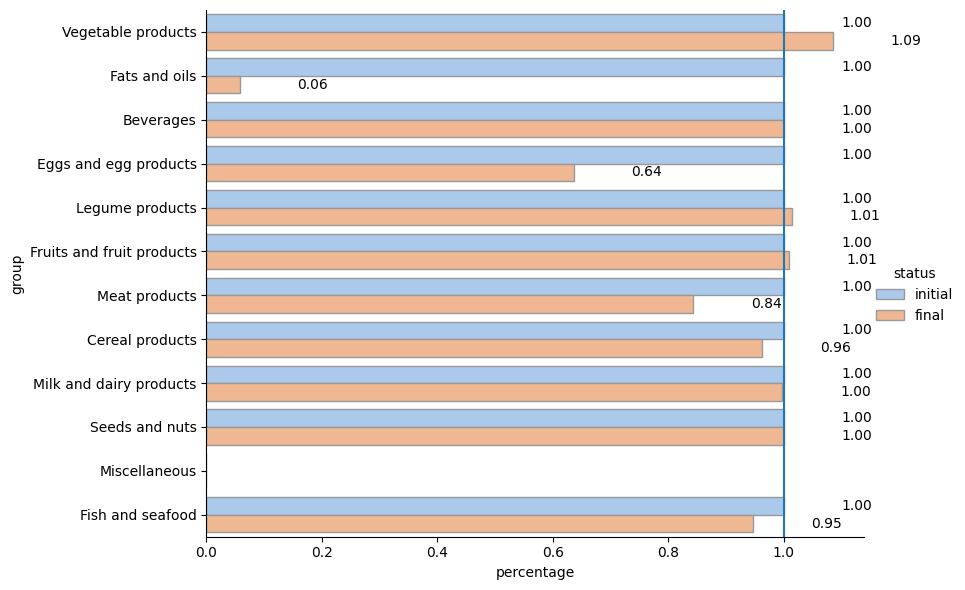

In [ ]:
showGroupBarGraph(female25G)

{'nutrient': ['Vegetable products', 'Fats and oils', 'Beverages', 'Eggs and egg products', 'Legume products', 'Fruits and fruit products', 'Meat products', 'Cereal products', 'Milk and dairy products', 'Seeds and nuts', 'Miscellaneous', 'Fish and seafood', 'Vegetable products', 'Fats and oils', 'Beverages', 'Eggs and egg products', 'Legume products', 'Fruits and fruit products', 'Meat products', 'Cereal products', 'Milk and dairy products', 'Seeds and nuts', 'Miscellaneous', 'Fish and seafood'], 'status': ['initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final'], 'value': [1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0576362864636804, 0.0, 1.0001140185850292, 0.911764705882353, 1.0066877106628858, 0.9957067725662767, 0.7605239017429418, 0.9815045399713523, 1.070860673743286, 0.0, 0.0, 0.97

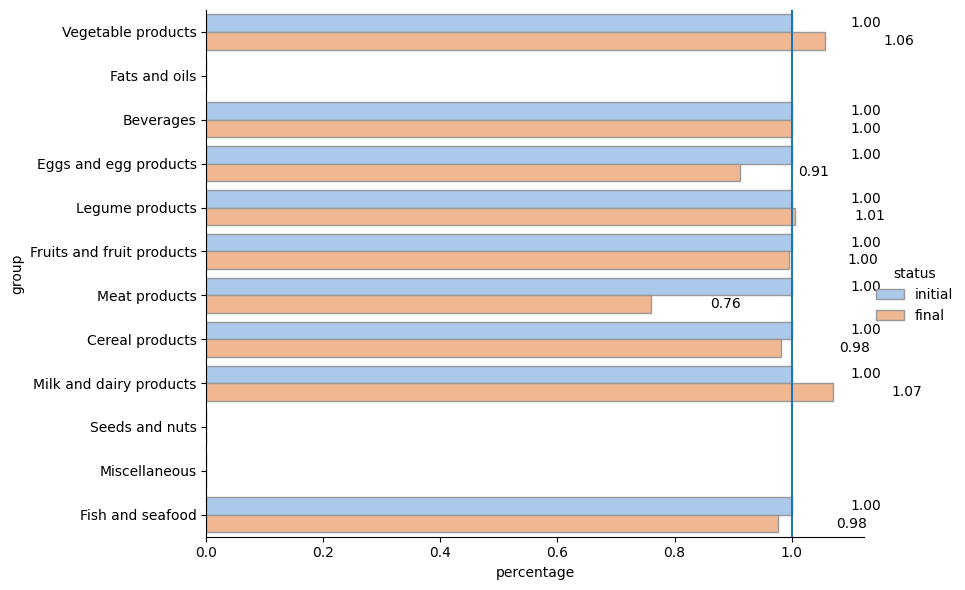

In [ ]:
showGroupBarGraph(female60G)

{'nutrient': ['Vegetable products', 'Fats and oils', 'Beverages', 'Eggs and egg products', 'Legume products', 'Fruits and fruit products', 'Meat products', 'Cereal products', 'Milk and dairy products', 'Seeds and nuts', 'Miscellaneous', 'Fish and seafood', 'Vegetable products', 'Fats and oils', 'Beverages', 'Eggs and egg products', 'Legume products', 'Fruits and fruit products', 'Meat products', 'Cereal products', 'Milk and dairy products', 'Seeds and nuts', 'Miscellaneous', 'Fish and seafood'], 'status': ['initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final'], 'value': [1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.1069340513269685, 0.0, 1.0, 0.7368421052631579, 1.0082567158669795, 1.0210107393529102, 0.7712759759466137, 0.9780127294724109, 1.0576088842616693, 1.0, 0.0, 0.934227010774242

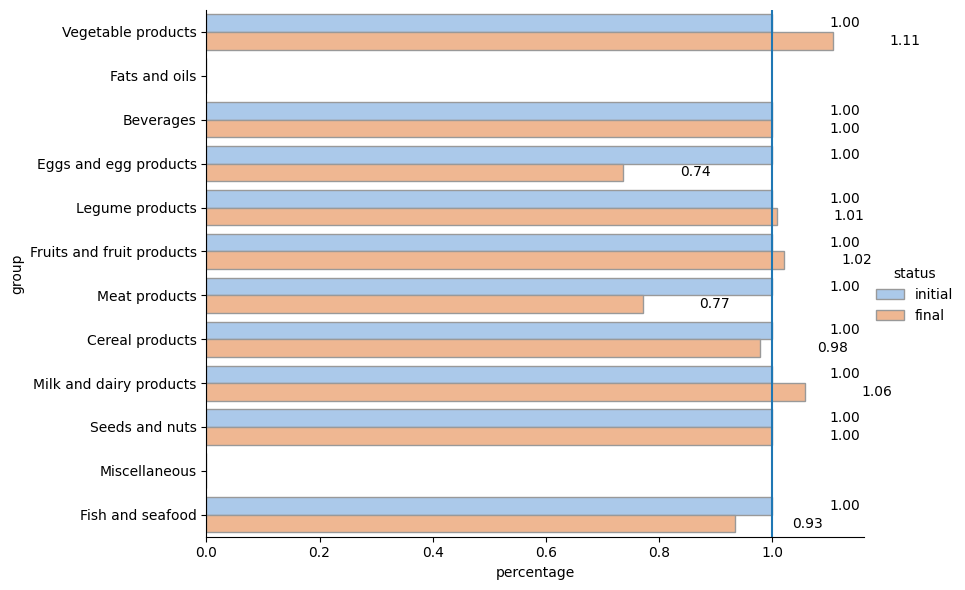

In [ ]:
showGroupBarGraph(male25G)

{'nutrient': ['Vegetable products', 'Fats and oils', 'Beverages', 'Eggs and egg products', 'Legume products', 'Fruits and fruit products', 'Meat products', 'Cereal products', 'Milk and dairy products', 'Seeds and nuts', 'Miscellaneous', 'Fish and seafood', 'Vegetable products', 'Fats and oils', 'Beverages', 'Eggs and egg products', 'Legume products', 'Fruits and fruit products', 'Meat products', 'Cereal products', 'Milk and dairy products', 'Seeds and nuts', 'Miscellaneous', 'Fish and seafood'], 'status': ['initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final'], 'value': [1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0756503415569056, 0.0, 1.0002712281209316, 0.8639455782312925, 0.9989670049219178, 1.0129438996162514, 0.8503987754773222, 0.9906861822516274, 1.040905134899913, 0.0, 1.0, 0.9

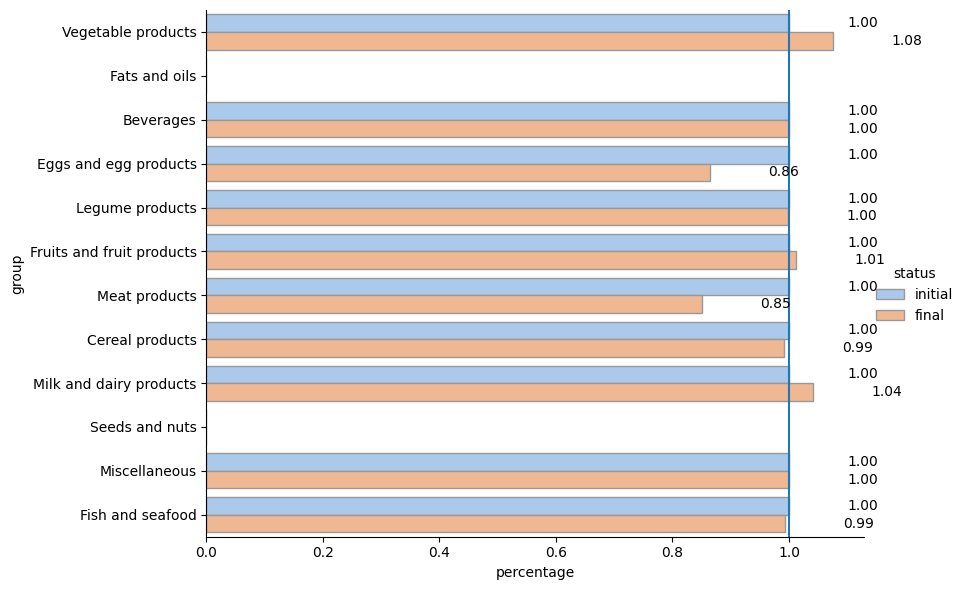

In [ ]:
showGroupBarGraph(male60G)

In [ ]:
def get_meal_dif(resultList:list[list[SearchResult]], first=0, last=3):
    mealList = get_meals_codes_list()
    
    dif = 0.0
    for meal in mealList:
        for result in resultList:
            dif += abs(result[first].initialMeal[meal]-result[last].finalMeal[meal])
    

    dif /= len(resultList)
           
        
    return dif

In [ ]:
for group in range(4):
    first = get_meal_dif(results[group], 0, 0)
    second = get_meal_dif(results[group], 1, 3)
    print(group, first, second, first+second)

0 314.75399999999996 88.35201783264748 403.10601783264747
1 281.79355555555554 101.14851851851856 382.94207407407407
2 294.39866666666666 86.80722222222222 381.20588888888886
3 264.9686666666667 71.59333333333333 336.562


In [ ]:
for result in results:
    print( sum( [ quantity for quantity in result[0][0].initialMeal.data.values() ] ) )

2910.0
6890.0
2344.0
4120.5
